# by: Abdulrahman Saeed

## Titanic Survival Prediction
• Build a binary Logistic Regression Model with the dataset (Train Data & Test Data)

Following are the must have things for submission of project :


    ♦ Proper EDA with explanation of impactful and useful variables
    ♦ Graphs wherever necessary
    ♦ Metrics for model evaluation:
            ♦ Confusion Matrix
            ♦ Accuracy Score
            ♦ F1 score, Precision, Recall, ROC-AUC 
            ♦ Model Optimization using K fold cross validation

• Consider column B (Survived) as the target (y) variable and rest of the columns as feature variables.

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import iqr
import warnings
warnings.filterwarnings('ignore')

from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, mean_absolute_error, accuracy_score, f1_score, roc_auc_score, roc_curve

In [2]:
df = pd.read_csv('Dataset/train.csv', index_col=0)
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Basic Information of Data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


### Summary statistics

In [4]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


##### Checking Missing Values

In [5]:
df.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

##### Insight :
    
   ♦ The columns name Age has 177, Cabin has 687 and Emabarked has 2 missing values respectively.
   
   ♦ As we can see the "Cabin" column has 77% missing values so we drop this column since this column indicates cabin number 		which is not much significant for prediction model. and 2 missing values
   
   ♦ fill null values in Age with median

In [6]:
df.drop(columns=['Cabin'], inplace=True)

In [7]:
df['Age'].fillna(round(df["Age"].median()),inplace=True)

In [8]:
df.dropna(inplace=True)

## Exploratory data analysis

### Insights from data considering all columns one by one

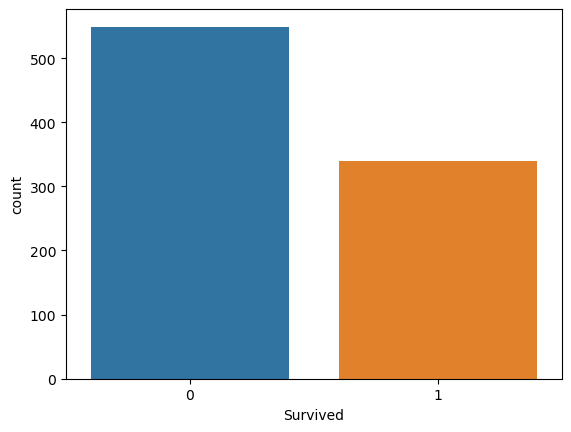

In [9]:
sns.countplot(data=df, x='Survived')
plt.show()

##### Insight :
    
   ♦ People died more as compare to survived.

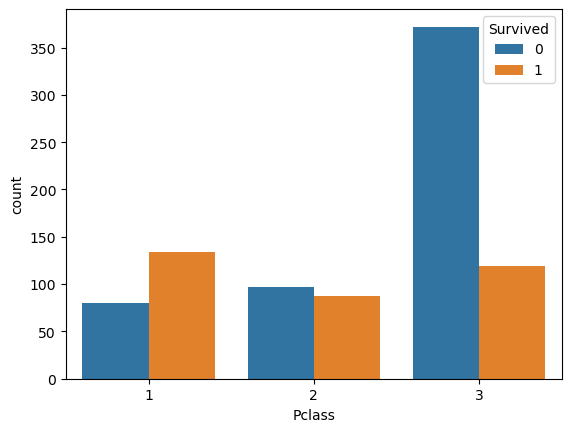

In [10]:
sns.countplot(data=df, x='Pclass', hue='Survived')
plt.show()

##### Insight :
    
   ♦ Passengers of class 3 were more.
   
   ♦ Class 1 passengers survived most, and class 3rd passengers died more 

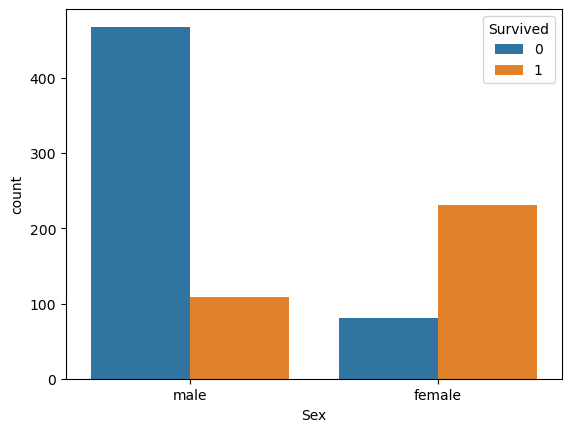

In [11]:
sns.countplot(data=df, x='Sex', hue='Survived')
plt.show()

##### Insight :
    
   ♦ We can see Male(0) have been passed away more than Female(1).

#### SibSp :-> Of Siblings / Spouses aboard the Titanic Ship
            The dataset defines family relations in this way:
            	1. Sibling = Brother, Sister, Stepbrother, Stepsister
            	2. Spouse = Husband, Wife (Mistresses & Fiancés were ignored))

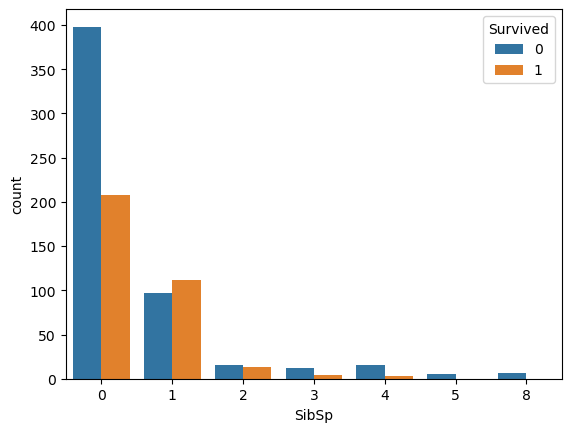

In [12]:
sns.countplot(data=df, x='SibSp', hue='Survived')
plt.show()

Parch :-> Of Parents / Children aboard the Titanic Ship
            The dataset defines family relations in this way:
            
                   Parent = mother, father
                   Child = daughter, son, stepdaughter, stepson
                   Some children travelled only with a Nanny, therefore parch=0 for them.

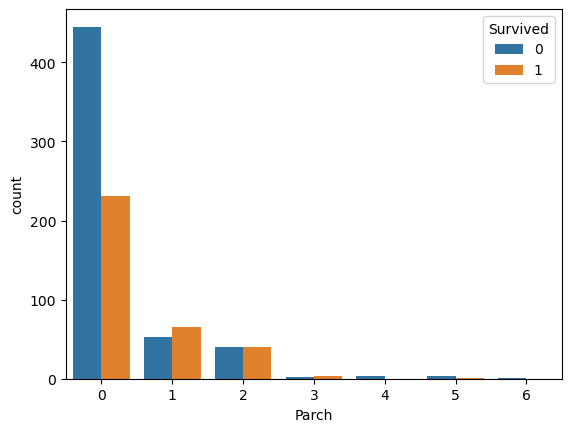

In [13]:
sns.countplot(data=df, x='Parch', hue='Survived')
plt.show()

##### Insight :
    
   ♦ The passengers who travelled alone had been died more.

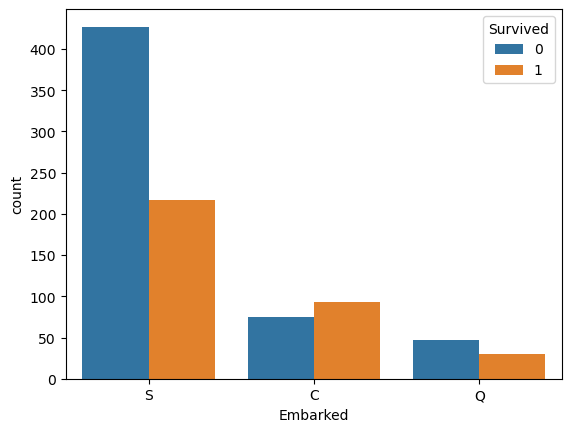

In [14]:
sns.countplot(data=df, x='Embarked', hue='Survived')
plt.show()

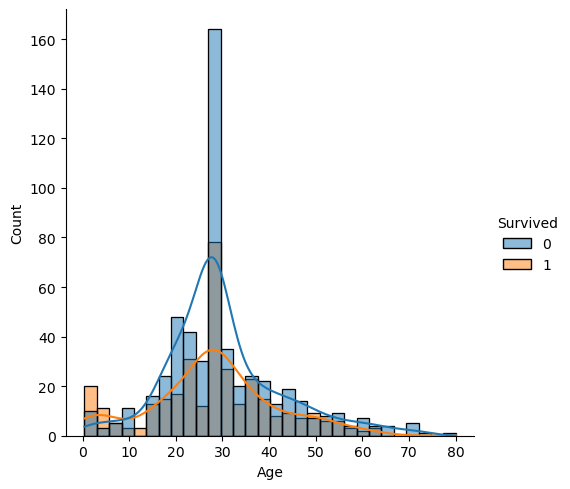

In [15]:
sns.displot(data=df, x='Age', kde=True, hue='Survived')
plt.show()

##### Insight :
    
   ♦ the major of dead Passengers are adult from 20 to 40
   
   ♦ the major of survived Passengers babies

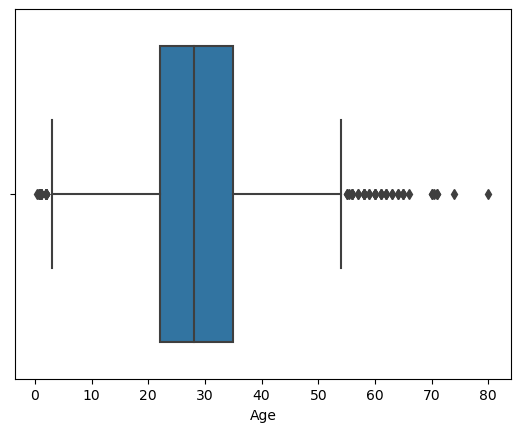

In [16]:
sns.boxplot(data=df, x='Age')
plt.show()

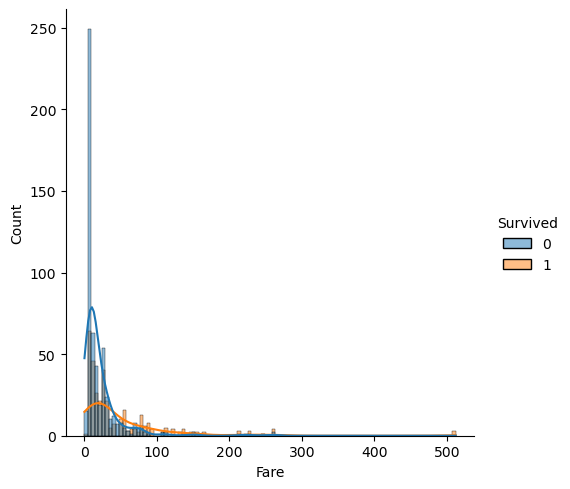

In [17]:
sns.displot(data=df, x='Fare', kde='True', hue='Survived')
plt.show()

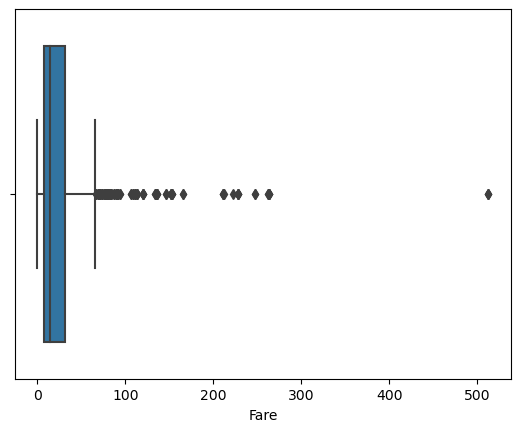

In [18]:
sns.boxplot(data=df, x='Fare')
plt.show()

From above statistical summary we can see there is big jump from 75% to max (31 to 512 ) in Fare and 35 to 80 in Age so Fare and Age have outliers

## Feature Engineering

In [19]:
IQR = iqr(df["Age"], axis=0)
IQR_lower_limit = int(df["Age"].quantile(.25) - 1.5 * IQR)
IQR_upper_limit = int(df["Age"].quantile(.75) + 1.5 * IQR)
df = df[df['Age'].between(IQR_lower_limit, IQR_upper_limit)]

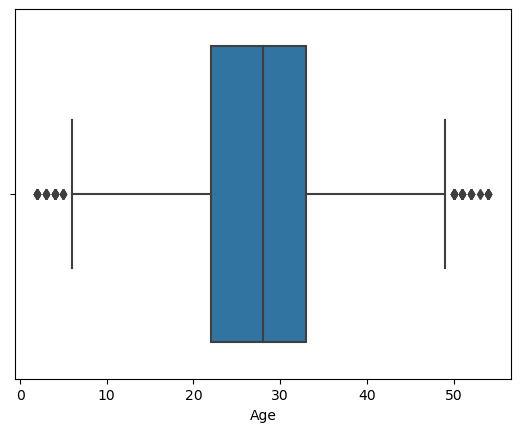

In [20]:
sns.boxplot(data=df, x='Age')
plt.show()

In [21]:
IQR = iqr(df["Fare"], axis=0)
IQR_lower_limit = int(df["Fare"].quantile(.25) - 1.5 * IQR)
IQR_upper_limit = int(df["Fare"].quantile(.75) + 1.5 * IQR)
df = df[df['Fare'].between(IQR_lower_limit, IQR_upper_limit)]

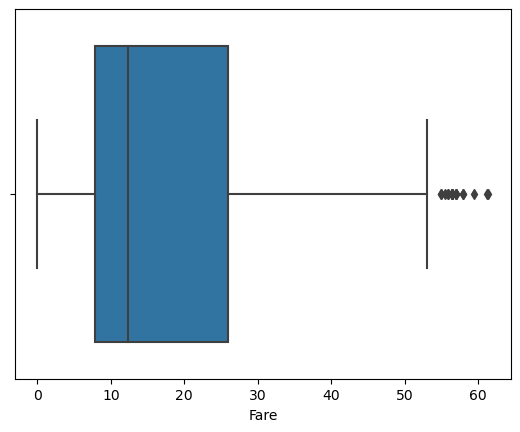

In [22]:
sns.boxplot(data=df, x='Fare')
plt.show()

### Correlation

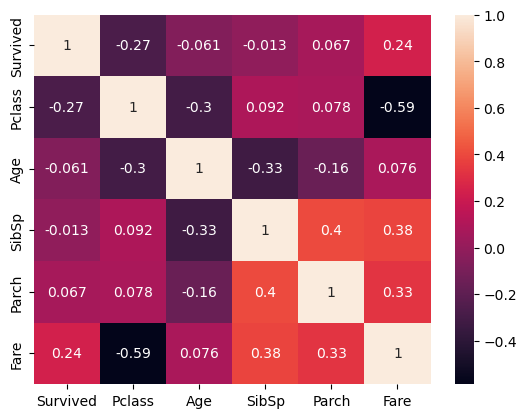

In [23]:
sns.heatmap(df.corr(), annot=True)
plt.show()

All features are not highly correlated with target feature that is "Survived" so we can consider all features.

## Feature Selection

#### drop Name and Ticket columns 

In [24]:
df.drop(columns=['Name', 'Ticket'], inplace=True)

In [25]:
X = df.drop(columns="Survived")
y = df['Survived']

### Label Encoding

In [26]:
encoder = LabelEncoder()

In [27]:
cols = X.select_dtypes('object')
for col in cols:
        X[col] = encoder.fit_transform(X[col])

In [28]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S
3,1,3,female,26.0,0,0,7.9250,S
4,1,1,female,35.0,1,0,53.1000,S
5,0,3,male,35.0,0,0,8.0500,S
6,0,3,male,28.0,0,0,8.4583,Q


### Scaling of features

In [29]:
scaler = StandardScaler()

In [30]:
X_scaled = scaler.fit_transform(X)
X_scaled

array([[ 0.67909139,  0.68894487, -0.55602675, ..., -0.41765477,
        -0.7595846 ,  0.53260822],
       [ 0.67909139, -1.45149496, -0.16966455, ..., -0.41765477,
        -0.70850784,  0.53260822],
       [-2.12601908, -1.45149496,  0.69965039, ..., -0.41765477,
         2.70985211,  0.53260822],
       ...,
       [ 0.67909139, -1.45149496,  0.02351654, ...,  2.12322404,
         0.46625781,  0.53260822],
       [-2.12601908,  0.68894487, -0.16966455, ..., -0.41765477,
         0.96189163, -2.2331502 ],
       [ 0.67909139,  0.68894487,  0.40987874, ..., -0.41765477,
        -0.72174996, -0.85027099]])

#### Computing VIF(Variance Inflation Factor) for detecting multicollinearity

In [31]:
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif["Features"] = X.columns

#let's check the values
vif

,vif,Features
0,2.060329,Pclass
1,1.118959,Sex
2,1.238221,Age
3,1.630100,SibSp
4,1.421966,Parch
5,2.428414,Fare
6,1.020709,Embarked


VIF(Variance Inflation Factor) of all features are less than 5 so we consider all features as relavant features for modelling.

### Splitting into Training and Testing Data

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

In [33]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (581, 7)
X_test shape: (146, 7)
y_train shape: (581,)
y_test shape: (146,)


### Building Prediction Model using Logistic Regression

In [34]:
model = LogisticRegression().fit(X_train, y_train)

In [35]:
y_pred = model.predict(X_test)

<Axes: >

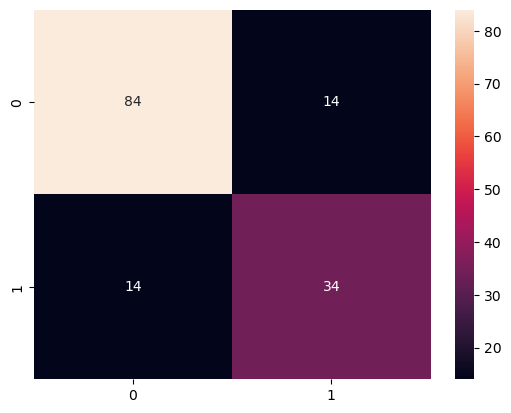

In [36]:
conf_mat = confusion_matrix(y_test,y_pred)
sns.heatmap(conf_mat, annot=True)

In [37]:
mean_absolute_error(y_pred, y_test)

0.1917808219178082

In [38]:
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.8082191780821918

In [39]:
f1_score(y_test, y_pred)

0.7083333333333334

In [40]:
auc = roc_auc_score(y_test, y_pred)
auc

0.7827380952380953

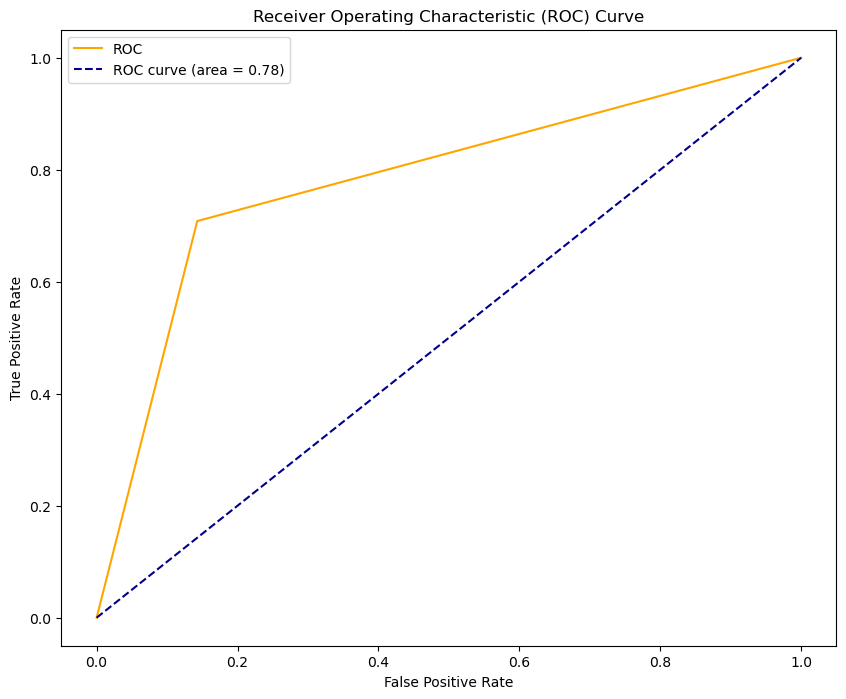

In [41]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

plt.figure(figsize=(10,8))
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

### k-Fold Cross Validation

In [42]:
scores = cross_val_score(model, X_train, y_train, cv = 5, scoring='accuracy')
print('Cross-validation scores:{}'.format(scores))

Cross-validation scores:[0.81196581 0.81896552 0.79310345 0.75862069 0.77586207]


In [43]:
print('Average cross-validation score: {:.4f}'.format(scores.mean()))

Average cross-validation score: 0.7917


### Conclusion :

	Here, I used Logistic regression algorithm for prediction and got 80.82% accuracy and 0.7083 F1 Score, 0.7827 AUC and K-Fold 0.7900.

## PREDICTIONS ON TEST DATA

In [44]:
df_test = pd.read_csv('Dataset/test.csv', index_col=0)

In [45]:
df_test.isna().sum()

Pclass        0
Name          0
Sex           0
Age          86
SibSp         0
Parch         0
Ticket        0
Fare          1
Cabin       327
Embarked      0
dtype: int64

In [46]:
df_test.drop(columns=['Cabin', 'Name', 'Ticket'], inplace=True)

In [47]:
df_test['Age'].fillna(round(df_test["Age"].median()),inplace=True)

In [48]:
df_test.dropna(inplace=True)

### Label Encoding

In [49]:
cols = df_test.select_dtypes('object')
for col in cols:
        df_test[col] = encoder.fit_transform(df_test[col])

In [50]:
df_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
892,3,1,34.5,0,0,7.8292,1
893,3,0,47.0,1,0,7.0000,2
894,2,1,62.0,0,0,9.6875,1
895,3,1,27.0,0,0,8.6625,2
896,3,0,22.0,1,1,12.2875,2


In [51]:
test_scaled = scaler.fit_transform(df_test)

In [52]:
test_pred = model.predict(test_scaled)

In [53]:
d_frame = {'Passenger Id': df_test.index, 'Survived': test_pred} 
     
prediction_df = pd.DataFrame(d_frame)
prediction_df

,Passenger Id,Survived
0,892,1
1,893,1
2,894,1
3,895,1
4,896,1
...,...,...
412,1305,1
413,1306,1
414,1307,1
415,1308,1


In [54]:
prediction_df.to_csv('Dataset/Titanic_Survived.csv')